In [12]:
import numpy as np
import matplotlib.pyplot as plt

In [34]:
def BilinearIsotropicMaterial(sigmaY0, E0, b, epssP, sigsP, depss, ep):
    
    
    ##### ----------------- INPUT PARAMETRS --------------------------------------------------------- #####
    #####                                                                                             #####
    #####                                                                                             #####
    #####   sigmaY0 = 500.0e6   #YIELD STRENGTH 500 MPA                                               #####
    #####   E0 = 200.0e9        # INITIAL ELASTIC MODULUS  200 GPA                                    #####
    #####   b = 0.03            # STRAIN HARDENING RATIO 3 %                                          #####
    #####   epssP = 0.0         # INITIAL STRAIN 0.0                                                  #####
    #####   sigsP = 0.0         # INITIAL STRESS 0.0                                                  #####
    #####   ep = 0.0            # INITIAL PLASTIC STRAIN 0.0                                          #####
    #####   depss = [0.00100,0.00400,-0.00125,-0.005]   # STRAIN INCREMENT IN EACH STEP               #####
    #####                                                                                             #####
    #####                                                                                             #####
    ##### ------------------------------------------------------------------------------------------- #####
    
    sigma = []
    sigma.append(sigsP)
    epsilon = []
    epsilon.append(epssP)
    
    l = len(depss)
    for i in range(l):
        sigmaY = sigmaY0 + (b * E0 / (1 - b)) * ep
        sigs_el = sigsP + E0 * depss[i]
        q = np.abs(sigs_el) - sigmaY
        
        if q <= 0:
            sigs = sigs_el
            Em = E0
            eps = epssP + depss[i]
        elif q > 0:
            depssPlastic = q * (1 - b) / E0
            sigs = sigs_el - np.sign(sigs_el) * E0 * depssPlastic
            Em = b * E0
            ep = ep + depssPlastic
            eps = epssP + depss[i]
        
        sigsP = sigs
        epssP = eps
        sigma.append(sigs)
        epsilon.append(eps)
    return sigma, epsilon

In [47]:
##### ---------- INPUT -------------- #####

sigmaY0 = 500.0e6              #YIELD STRENGTH  MPA               
E0 = 200.0e9                   #INITIAL ELASTIC MODULUS  GPA
b = 0.03                       # STRAIN HARDENING RATIO  3 % 
epssP = 0.0                    # INITIAL STRAIN 0.0  
sigsP = 0.0                    # INITIAL STRESS 0.0
ep = 0.0                        # INITIAL PLASTIC STRAIN 0.0


depss = [0.00100,0.00400,-0.00125,-0.005]                # STRAIN INCREMENT IN EACH STEP  ### copy paste here ###


sigma, epsilon = BilinearIsotropicMaterial(sigmaY0, E0, b, epssP, sigsP, depss, ep)
print("sigma:", sigma)
print("Epsilon:", epsilon)

sigma: [0.0, 200000000.0, 515000000.0, 265000000.0, -521600000.0]
Epsilon: [0.0, 0.001, 0.005, 0.00375, -0.0012500000000000002]


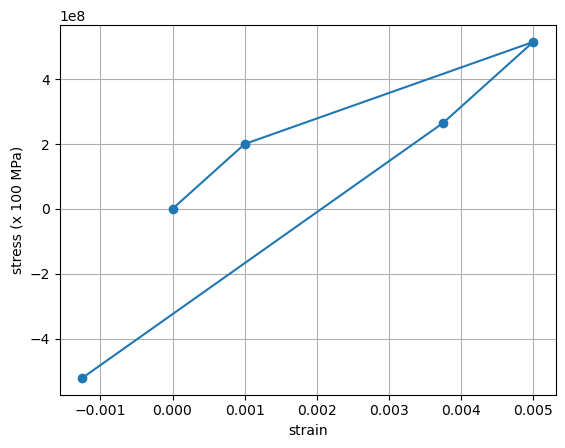

In [55]:
plt.plot(epsilon,sigma, marker = 'o')
plt.grid()
plt.xlabel("strain")
plt.ylabel("stress (x 100 MPa)") 
plt.show()